<a href="https://colab.research.google.com/github/shahdhruv29/woc5.0-ml-weather-prediction-case-study-dhruvshah29/blob/main/Checkpoint7_Woc5_0_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
df= pd.read_csv('/content/weather.csv')
df = df.sample(frac = 1)
print(df.head())

      precipitation  temp_max  temp_min  wind weather
167             0.0      21.1      15.0   4.1    rain
410             1.0       9.4       5.6   2.2    rain
1248            0.5      17.8      12.8   5.0    rain
300            23.1      14.4       9.4   5.1    rain
87              1.3      10.6       7.2   5.9    rain


In [37]:
print(df)

      precipitation  temp_max  temp_min  wind weather
167             0.0      21.1      15.0   4.1    rain
410             1.0       9.4       5.6   2.2    rain
1248            0.5      17.8      12.8   5.0    rain
300            23.1      14.4       9.4   5.1    rain
87              1.3      10.6       7.2   5.9    rain
...             ...       ...       ...   ...     ...
783             2.5       5.6       2.8   3.1    rain
657             0.0      10.6       7.8   1.4     sun
757             0.0       9.4       1.7   1.3     sun
215             0.0      27.2      12.8   3.9     sun
1457            1.5       5.0       1.7   1.3    rain

[1461 rows x 5 columns]


In [38]:
print(df.dtypes)

precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object


In [39]:
df['temp_avg'] =(df['temp_max'] + df['temp_min'])/2

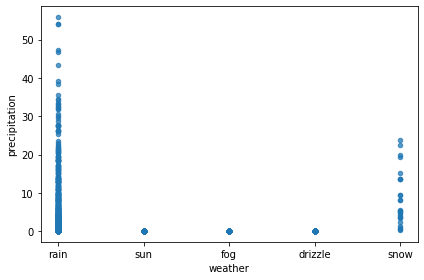

In [40]:
df.plot.scatter(x="weather", y="precipitation",linewidth=1,alpha=0.75)
plt.tight_layout()
plt.show()

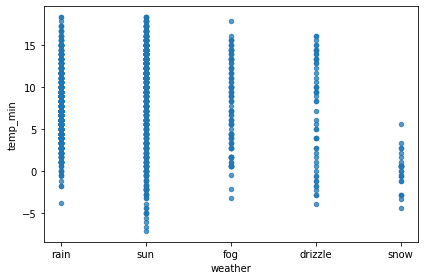

In [41]:
df.plot.scatter(x="weather", y="temp_min",linewidth=1,alpha=0.75)
plt.tight_layout()
plt.show()

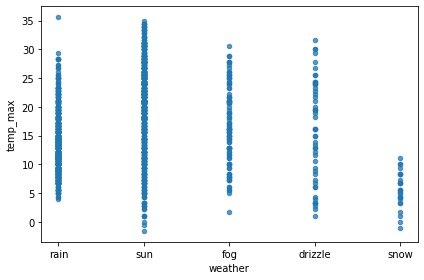

In [42]:
df.plot.scatter(x="weather", y="temp_max",linewidth=1,alpha=0.75)
plt.tight_layout()
plt.show()

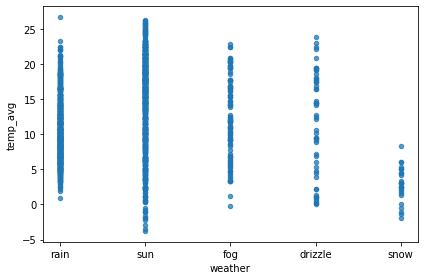

In [43]:
df.plot.scatter(x="weather", y="temp_avg",linewidth=1,alpha=0.75)
plt.tight_layout()
plt.show()

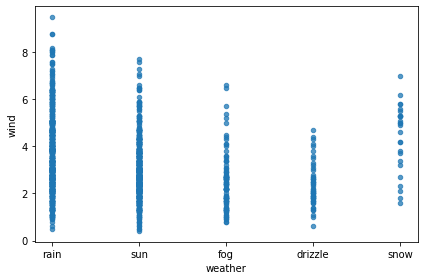

In [44]:
df.plot.scatter(x="weather", y="wind",linewidth=1,alpha=0.75)
plt.tight_layout()
plt.show()

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X =df[['precipitation','temp_max', 'temp_min', 'wind', 'temp_avg']]
y= df['weather']

In [47]:
print(X)
print(y.unique)

      precipitation  temp_max  temp_min  wind  temp_avg
167             0.0      21.1      15.0   4.1     18.05
410             1.0       9.4       5.6   2.2      7.50
1248            0.5      17.8      12.8   5.0     15.30
300            23.1      14.4       9.4   5.1     11.90
87              1.3      10.6       7.2   5.9      8.90
...             ...       ...       ...   ...       ...
783             2.5       5.6       2.8   3.1      4.20
657             0.0      10.6       7.8   1.4      9.20
757             0.0       9.4       1.7   1.3      5.55
215             0.0      27.2      12.8   3.9     20.00
1457            1.5       5.0       1.7   1.3      3.35

[1461 rows x 5 columns]
<bound method Series.unique of 167     rain
410     rain
1248    rain
300     rain
87      rain
        ... 
783     rain
657      sun
757      sun
215      sun
1457    rain
Name: weather, Length: 1461, dtype: object>


In [48]:
print(y.value_counts())

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64


In [49]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=10)

In [50]:
print(len(X_train), len(X_test))

1168 293


In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
# We implement the KNN from here
neighbors = np.arange(1,10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [53]:
#Loop over K values:
for i,k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)

  train_accuracy[i] = knn.score(X_train, y_train)
  test_accuracy[i] = knn.score(X_test, y_test)


In [64]:
print(max(test_accuracy), np.mean(test_accuracy)) # Maximum Accuracy on test data is around 75%, this is also lower than our Logistic Regression Model.

0.7508532423208191 0.7114144861585134


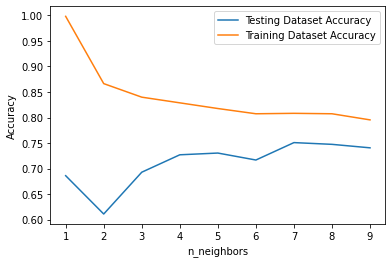

In [55]:
plt.plot(neighbors, test_accuracy, label = "Testing Dataset Accuracy")
plt.plot(neighbors, train_accuracy, label = "Training Dataset Accuracy")
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

## Now we use `weights = 'weights'` in the KNeighboursClassifier function.

In [57]:
for i,k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors = k, weights='distance')
  knn.fit(X_train, y_train)

  train_accuracy[i] = knn.score(X_train, y_train)
  test_accuracy[i] = knn.score(X_test, y_test)

In [63]:
print(max(test_accuracy))
print(np.mean(test_accuracy))

0.7508532423208191
0.7114144861585134


## Now we use `weights = 'uniform'` in the KNeighboursClassifier function.

In [59]:
# Now we use weights = 'uniform'

In [60]:
for i,k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors = k, weights='uniform')
  knn.fit(X_train, y_train)

  train_accuracy[i] = knn.score(X_train, y_train)
  test_accuracy[i] = knn.score(X_test, y_test)

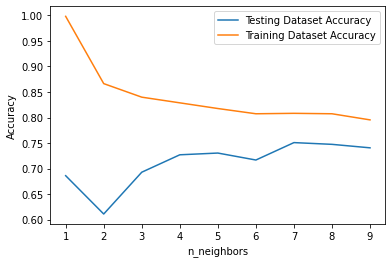

In [61]:
plt.plot(neighbors, test_accuracy, label = "Testing Dataset Accuracy")
plt.plot(neighbors, train_accuracy, label = "Training Dataset Accuracy")
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [62]:
print(np.mean(test_accuracy), max(test_accuracy))

0.7114144861585134 0.7508532423208191


In [65]:
from scipy.stats.mstats import winsorize

# Here 10% of the largest values in the dataset are replaced with the meadian
# But no data from the lower data points is replaced.

df['precipitation'] = winsorize(df['precipitation'], (0, 0.10))
df['temp_max'] = winsorize(df['temp_max'], (0, 0.10))
df['temp_min'] = winsorize(df['temp_min'], (0, 0.10))
df['wind'] = winsorize(df['wind'], (0, 0.10))
df['temp_avg'] = winsorize(df['temp_avg'], (0, 0.10))

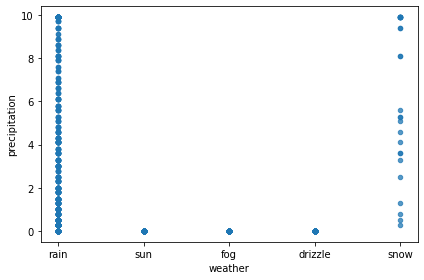

In [66]:
df.plot.scatter(x="weather", y="precipitation",linewidth=1,alpha=0.75)
plt.tight_layout()
plt.show()

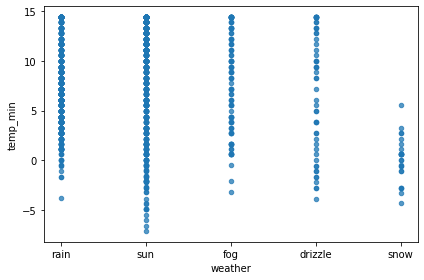

In [67]:
df.plot.scatter(x="weather", y="temp_min",linewidth=1,alpha=0.75)
plt.tight_layout()
plt.show()

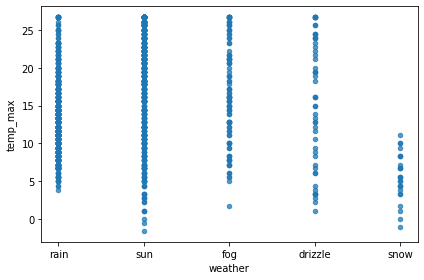

In [68]:
df.plot.scatter(x="weather", y="temp_max",linewidth=1,alpha=0.75)
plt.tight_layout()
plt.show()

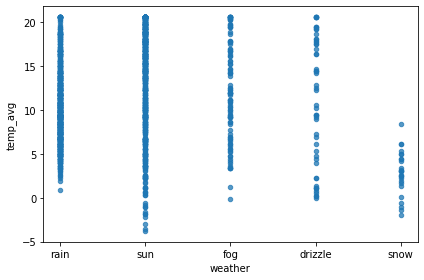

In [69]:
df.plot.scatter(x="weather", y="temp_avg",linewidth=1,alpha=0.75)
plt.tight_layout()
plt.show()

In [70]:
from sklearn.model_selection import train_test_split

In [72]:
X =df[['precipitation','temp_max', 'temp_min', 'wind', 'temp_avg']]
y= df['weather']
print(X)
print(y.unique)
print(y.value_counts())

      precipitation  temp_max  temp_min  wind  temp_avg
167             0.0      21.1      14.4   4.1     18.05
410             1.0       9.4       5.6   2.2      7.50
1248            0.5      17.8      12.8   5.0     15.30
300             9.9      14.4       9.4   5.1     11.90
87              1.3      10.6       7.2   5.2      8.90
...             ...       ...       ...   ...       ...
783             2.5       5.6       2.8   3.1      4.20
657             0.0      10.6       7.8   1.4      9.20
757             0.0       9.4       1.7   1.3      5.55
215             0.0      26.7      12.8   3.9     20.00
1457            1.5       5.0       1.7   1.3      3.35

[1461 rows x 5 columns]
<bound method Series.unique of 167     rain
410     rain
1248    rain
300     rain
87      rain
        ... 
783     rain
657      sun
757      sun
215      sun
1457    rain
Name: weather, Length: 1461, dtype: object>
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weat

In [73]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=10)

In [74]:
# We implement the KNN from here

neighbors = np.arange(1,10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#Loop over K values:
for i,k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)

  train_accuracy[i] = knn.score(X_train, y_train)
  test_accuracy[i] = knn.score(X_test, y_test)


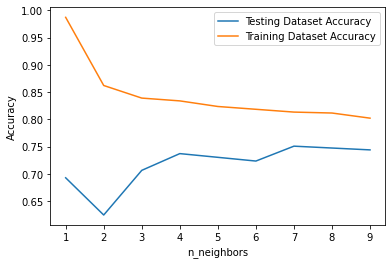

In [75]:
plt.plot(neighbors, test_accuracy, label = "Testing Dataset Accuracy")
plt.plot(neighbors, train_accuracy, label = "Training Dataset Accuracy")
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [77]:
print(np.mean(test_accuracy))
print(max(test_accuracy))

0.7174819871065605
0.7508532423208191
